In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Data Collection and Preprocessing
#Load the datatset
heart_df = pd.read_csv('/Users/vaishnavimhaske/Documents/Multiplt_Disease_Prediction/datasets/heart_disease_data.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Data Understanding
heart_df.shape

(303, 14)

In [4]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
# Data Transformation
data = heart_df.copy()

In [9]:
data.replace({'Sex': {0:'Female', 1:'Male'}}, inplace=True)

In [10]:
data.replace({'Target': {0:'Clean', 1:'Disease'}},inplace=True)

In [11]:
# Splitting features and target variable
X = data.drop(['target'], axis=1)
Y = data['target']

/var/folders/np/fsmmqv553396h0shtq8tcsv40000gn/T/ipykernel_19241/4229528769.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')


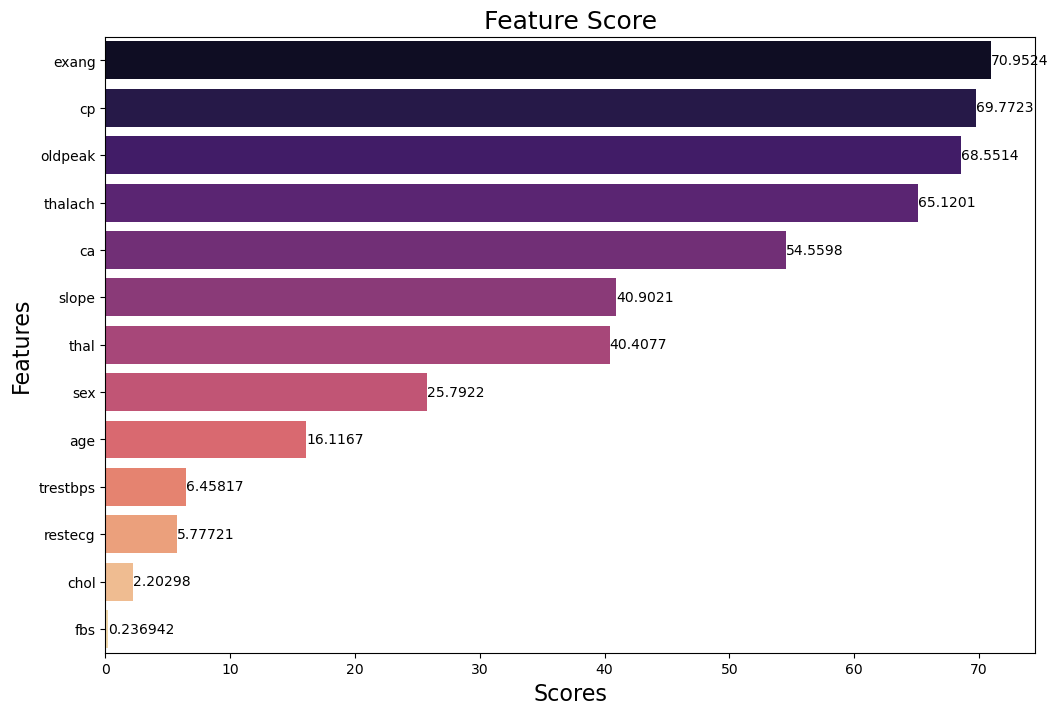

In [12]:
# Finding best features for model
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X,Y)

# Creating list of all columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Creating new dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sorted the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

# Plot barplot for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [13]:
# Feature Transformation
# Dropped the low scored features
X = X.drop(['trestbps', 'restecg', 'chol', 'fbs'], axis=1)

In [14]:
# Storing all columns name in a variable
col = X.columns

# Data Standardization
scaler = StandardScaler()

X[col] = scaler.fit_transform(X[col])
X.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [15]:
# Splitting the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Data Modeling
knn = KNeighborsClassifier()

# Creating params for our class
params_knn = {'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean', 'manhattan', 'chebyshev']}

# Running the model with GridSearchCV
grid_knn = GridSearchCV(knn, params_knn, cv=6, n_jobs=-1)
grid_knn.fit(X_train,Y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [17]:
# Predicting best model
best_knn_model = grid_knn.best_estimator_

# Predicting the result
Y_pred_knn = best_knn_model.predict(X_test)

In [18]:
print(f'Accuracy Score for {best_knn_model}: ', accuracy_score(Y_test, Y_pred_knn))

Accuracy Score for KNeighborsClassifier(metric='euclidean', n_neighbors=7):  0.8360655737704918


In [19]:
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Text(95.72222222222221, 0.5, 'Actual Value')

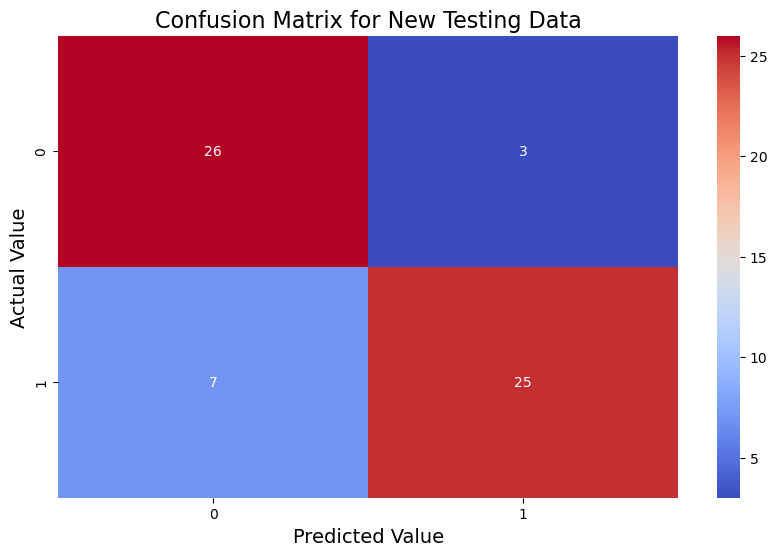

In [20]:
cm = confusion_matrix(Y_test, Y_pred_knn)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [21]:
# Saving the trained model
import pickle
filename = 'Heart_Disease_Prediction.sav'
scaler_filename = 'scaler_heart.sav'
pickle.dump(best_knn_model, open(filename, 'wb'))
pickle.dump(scaler, open(scaler_filename, 'wb'))

In [22]:
# Loading the model and the scaler
loaded_model = pickle.load(open(filename, 'rb'))
loaded_scaler = pickle.load(open(scaler_filename, 'rb'))

In [23]:
# Building a Predictive System
input_data = (67,1,0,108,1,1.5,1,3,2)

# Changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the data
std_data = loaded_scaler.transform(input_data_reshaped)

# Make a prediction
prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The Person does not have a Heart Disease.')
else:
    print('The Person has Heart Disease.')

[0]
The Person does not have a Heart Disease.


/opt/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
